In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_csv("H:\boiling_liquid_expanding_vapour_explosion\train(1).csv")

test = pd.read_csv("H:\boiling_liquid_expanding_vapour_explosion\test(1).csv")

In [3]:
from sklearn.model_selection import train_test_split
df1, df2 = train_test_split(df,test_size=0.2,random_state=5)
df1.shape

(8000, 25)

In [4]:
df = pd.concat([df,df1])   #Data Augmentation for better performance in leaderboard

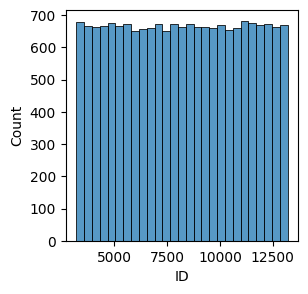

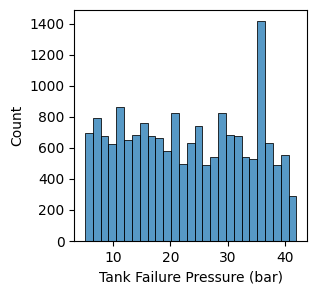

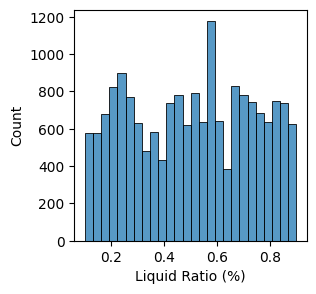

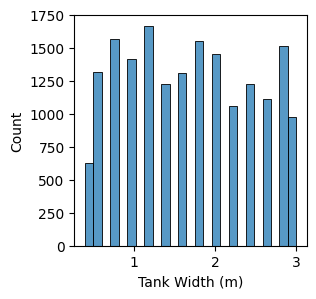

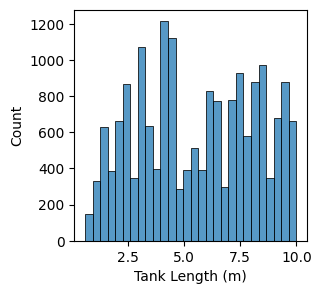

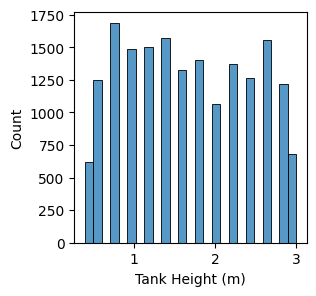

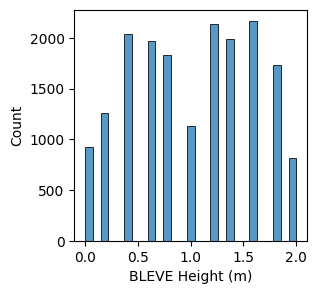

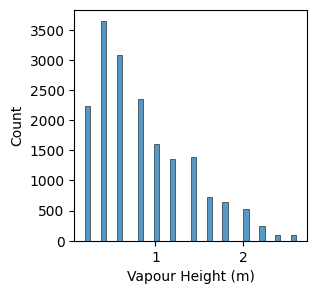

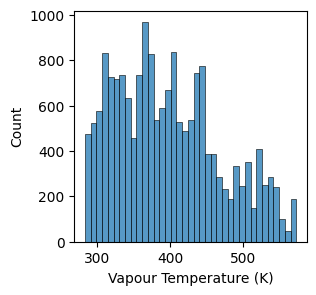

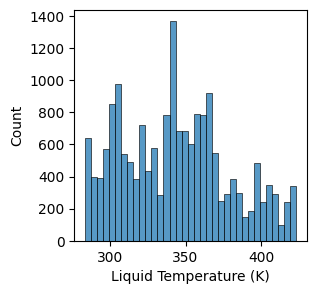

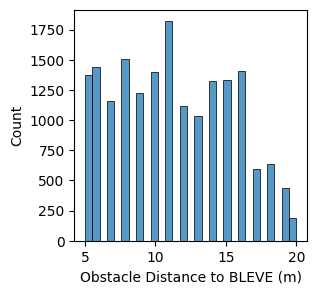

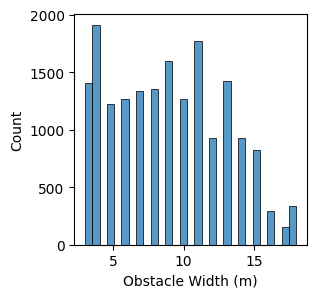

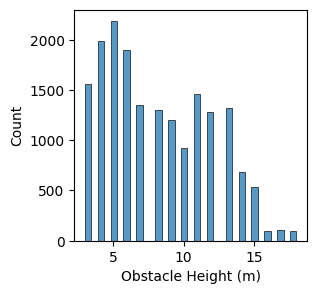

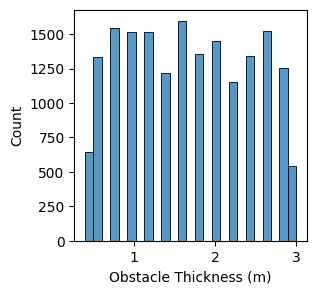

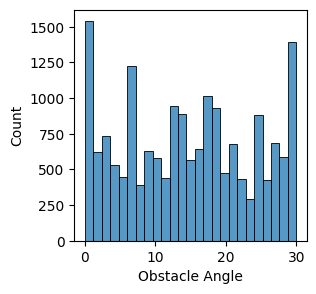

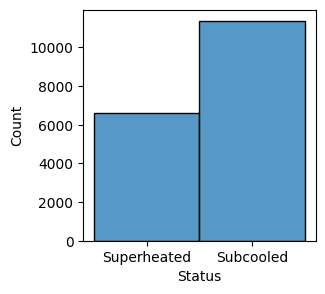

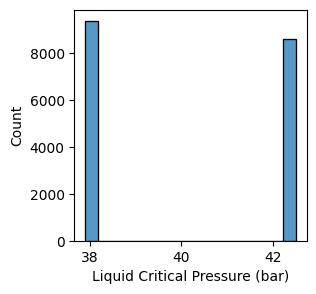

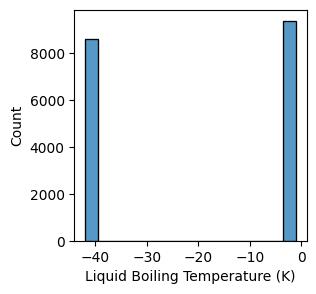

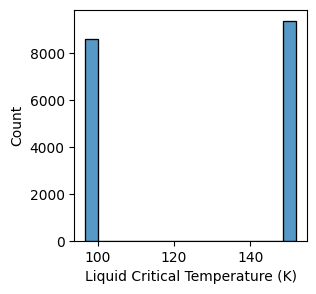

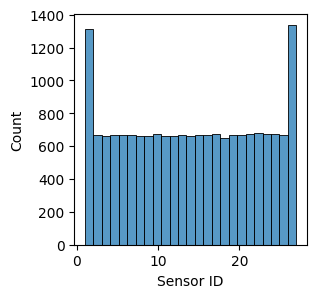

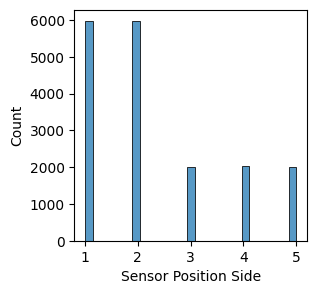

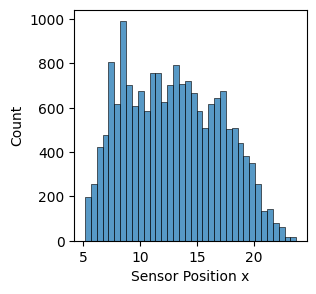

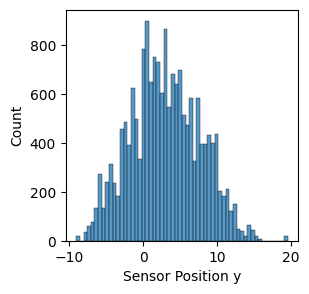

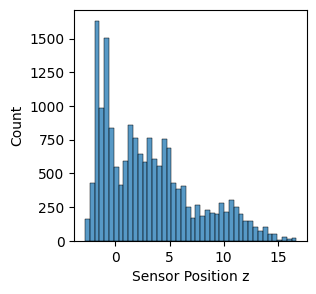

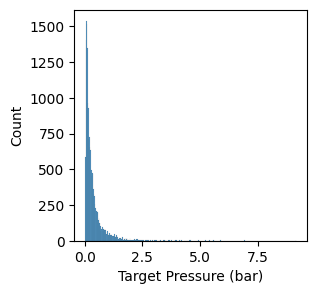

In [12]:
for col in df.columns:
        fig ,ax  = plt.subplots(figsize = (3,3))
        sns.histplot(df[col],ax=ax)
        plt.show()

<Axes: xlabel='Target Pressure (bar)', ylabel='Count'>

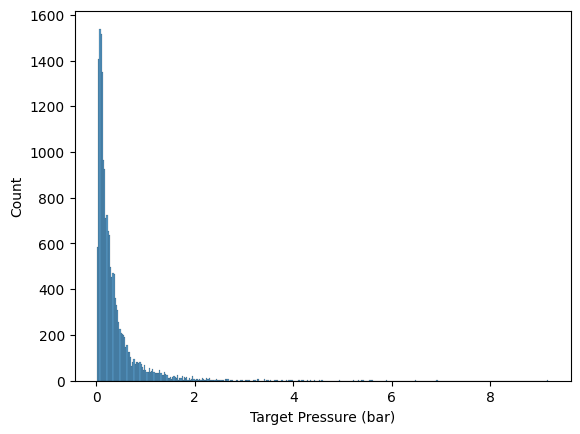

In [5]:
sns.histplot(df['Target Pressure (bar)'])

In [11]:
len(df[df['Target Pressure (bar)']>1])

1254

In [13]:
df= df[df['Target Pressure (bar)']<1]   # To improve skewness maintaining range

<Axes: xlabel='Target Pressure (bar)', ylabel='Count'>

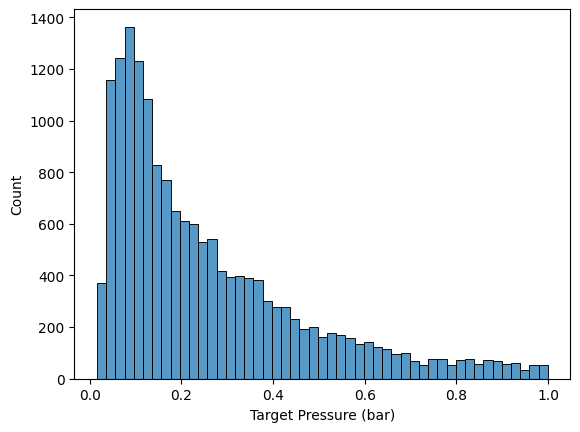

In [15]:
sns.histplot(df['Target Pressure (bar)'])   # Its much better now

In [16]:
# Calculate Obstacle Volume
df['Obstacle_Volume'] = df['Obstacle Width (m)'] * df['Obstacle Height (m)'] *df['Obstacle Thickness (m)']

# Creating new col volume of tank
df["Tank_Volume"] = df["Tank Length (m)"] * df['Tank Height (m)'] * df['Tank Width (m)']

In [21]:
# Putting target col at end for heatmap
df.drop(columns='ID',axis='y',inplace=True)
df_encoded.drop(columns='ID',axis='y',inplace=True)
# Putting Target Pressure (bar) at last 
r = df['Target Pressure (bar)']
df.drop('Target Pressure (bar)',axis=1,inplace=True)
df['Target Pressure (bar)'] = r

<Axes: >

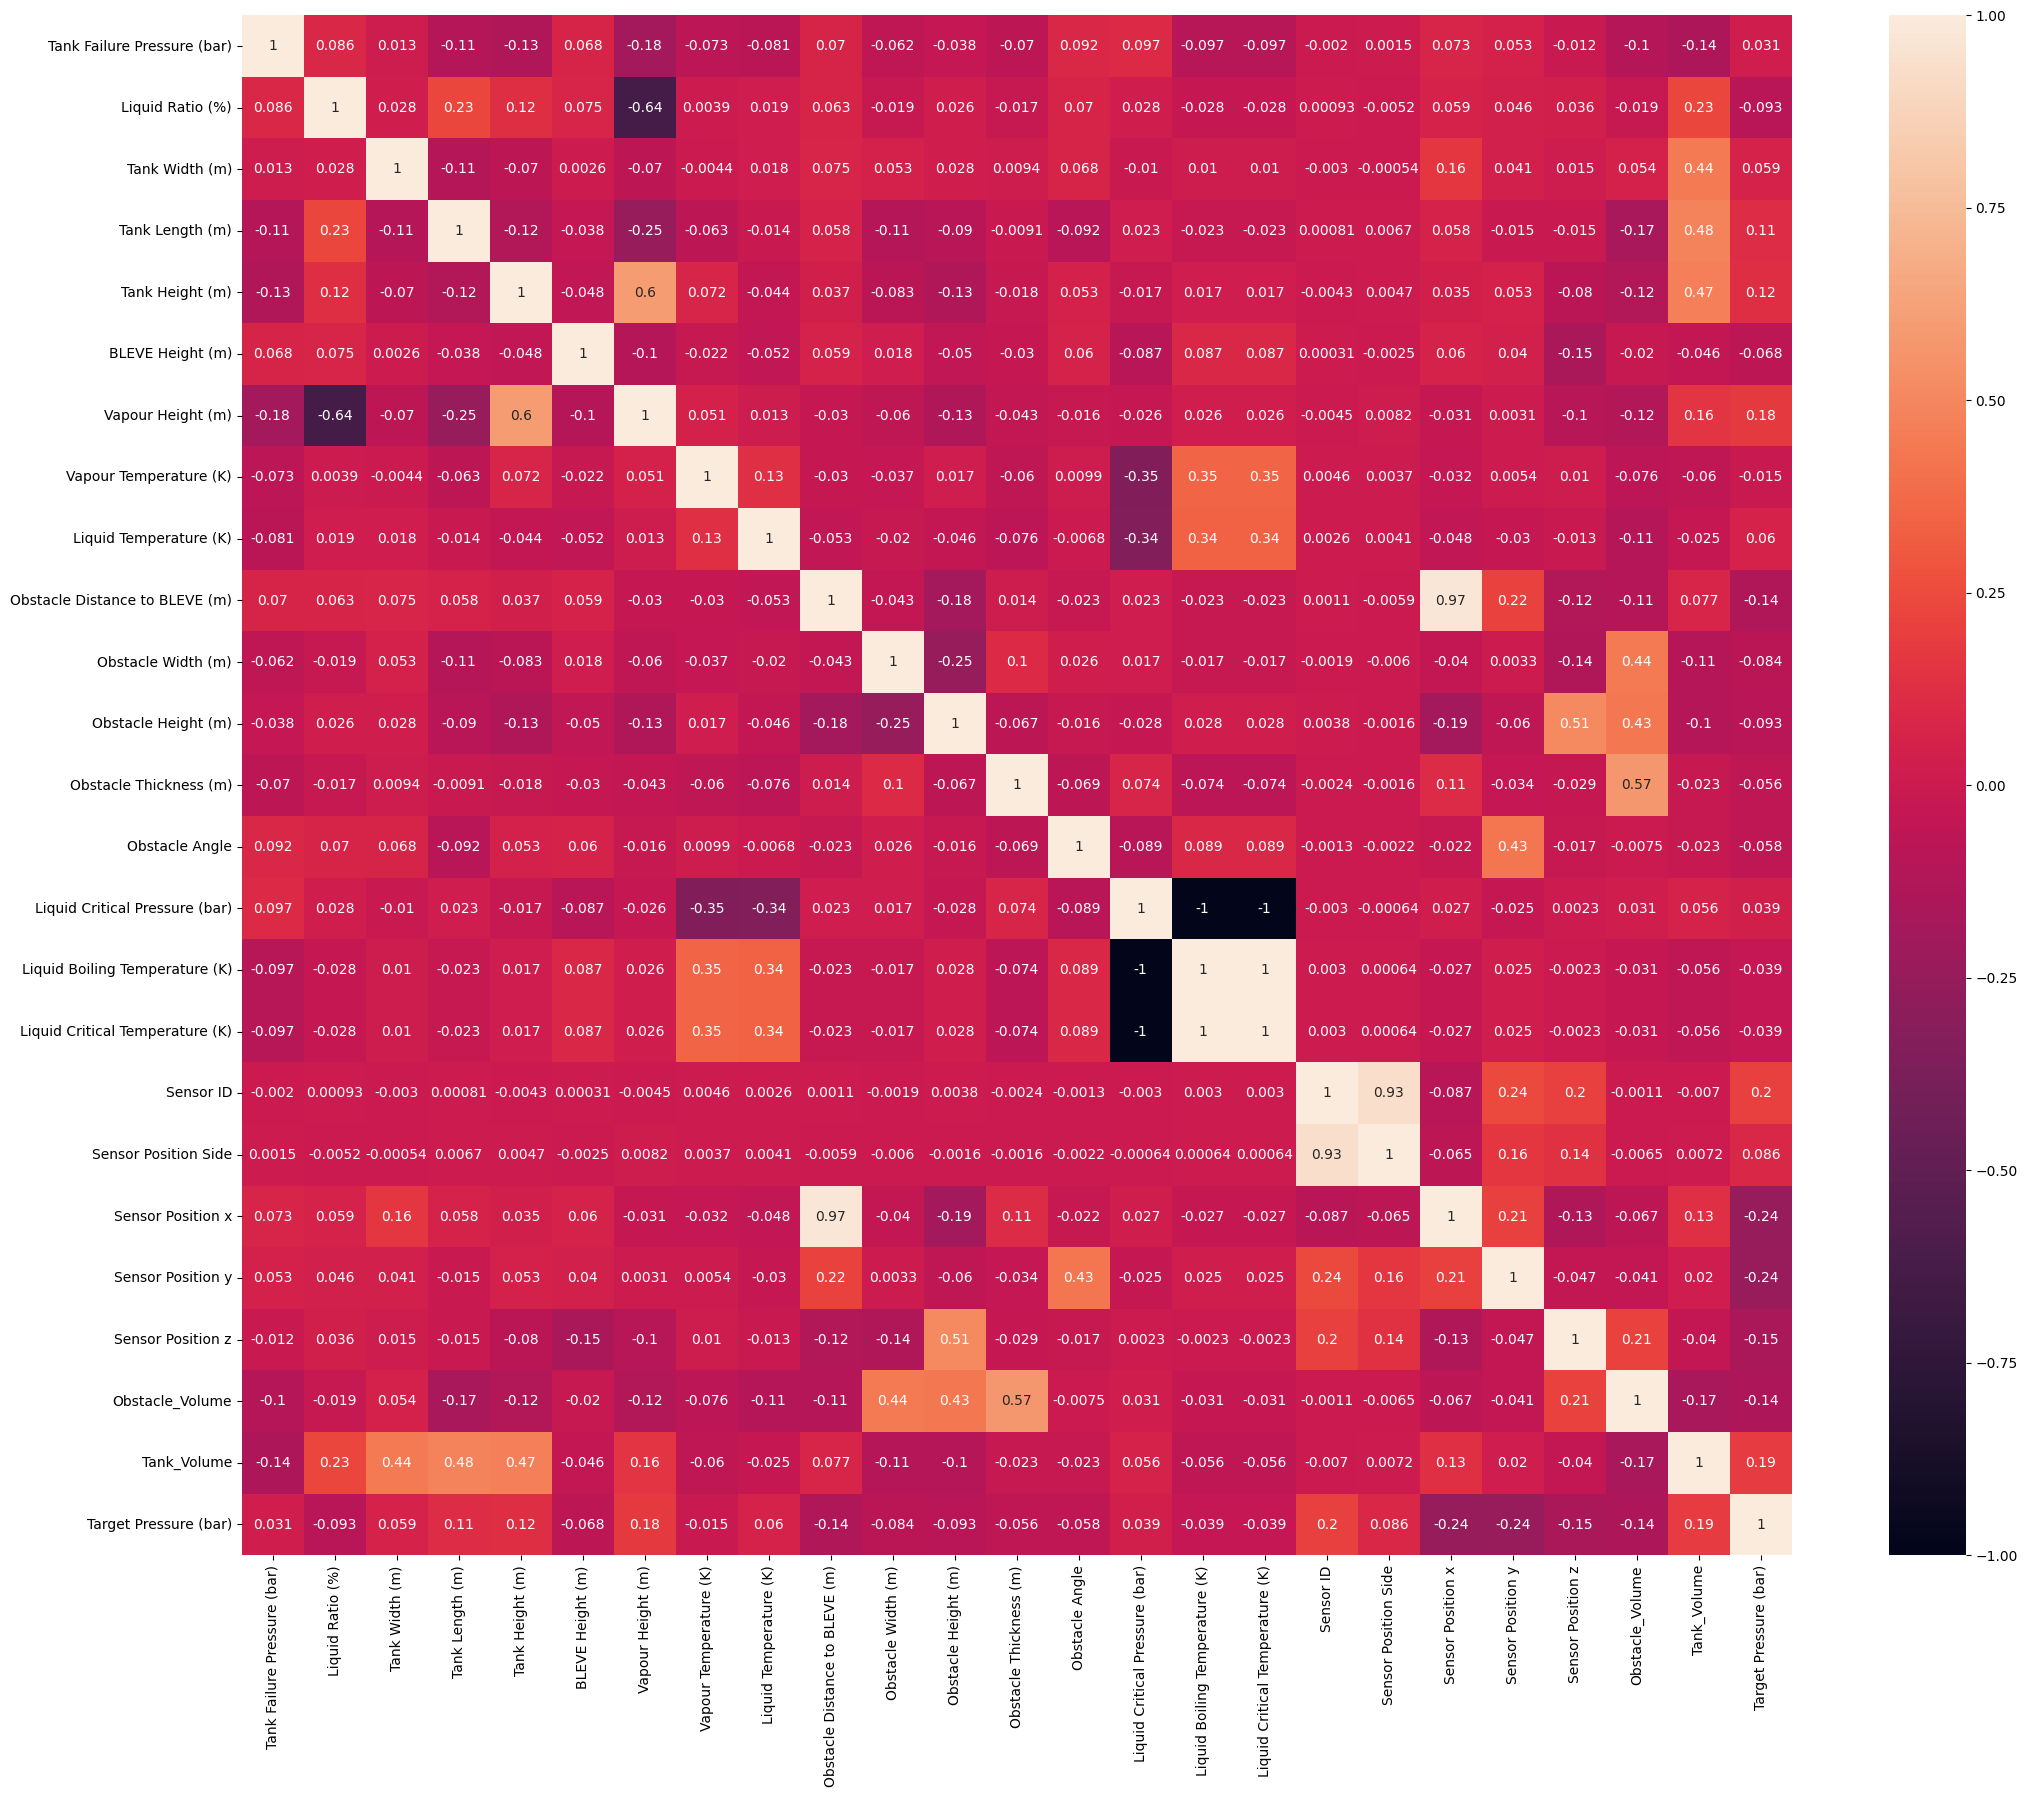

In [23]:
corr_df = pd.DataFrame(df.corr(numeric_only=True))
fig ,ax  = plt.subplots(figsize = (25,20))
sns.heatmap(corr_df,annot=True,ax=ax)

### Columns to be removed:
- Tank Width (m) 
- Tank Length (m) 
- Tank Height (m)    #Volume is taken no need of them anymore.
- Obstacle Width (m) 
- Obstacle Thickness (m)
- Obstacle Height (m)    # Volume is taken thats why no need to keep this

- Liquid Ratio (%)                                     # high corelation with vapour height
- Obstacle Distance to BLEVE (m)                       # Distance x is already given
- Liquid Boiling Temperature (K)                       # not needed and high corr 
- Liquid Critical Pressure (bar)  0.045   # Correlation is 1 with other 2 col Liquid Boiling Temperature and Liquid Critical Temperature
- Liquid Critical Temperature (K)  # High Correlation
##### Ignore status as it is a categorical col

In [25]:
df.drop(columns=['Tank Width (m)','Tank Length (m)','Tank Height (m)','Obstacle Width (m)','Obstacle Thickness (m)','Obstacle Height (m)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)','Liquid Critical Pressure (bar)','Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)'],axis='y',inplace=True)

<Axes: >

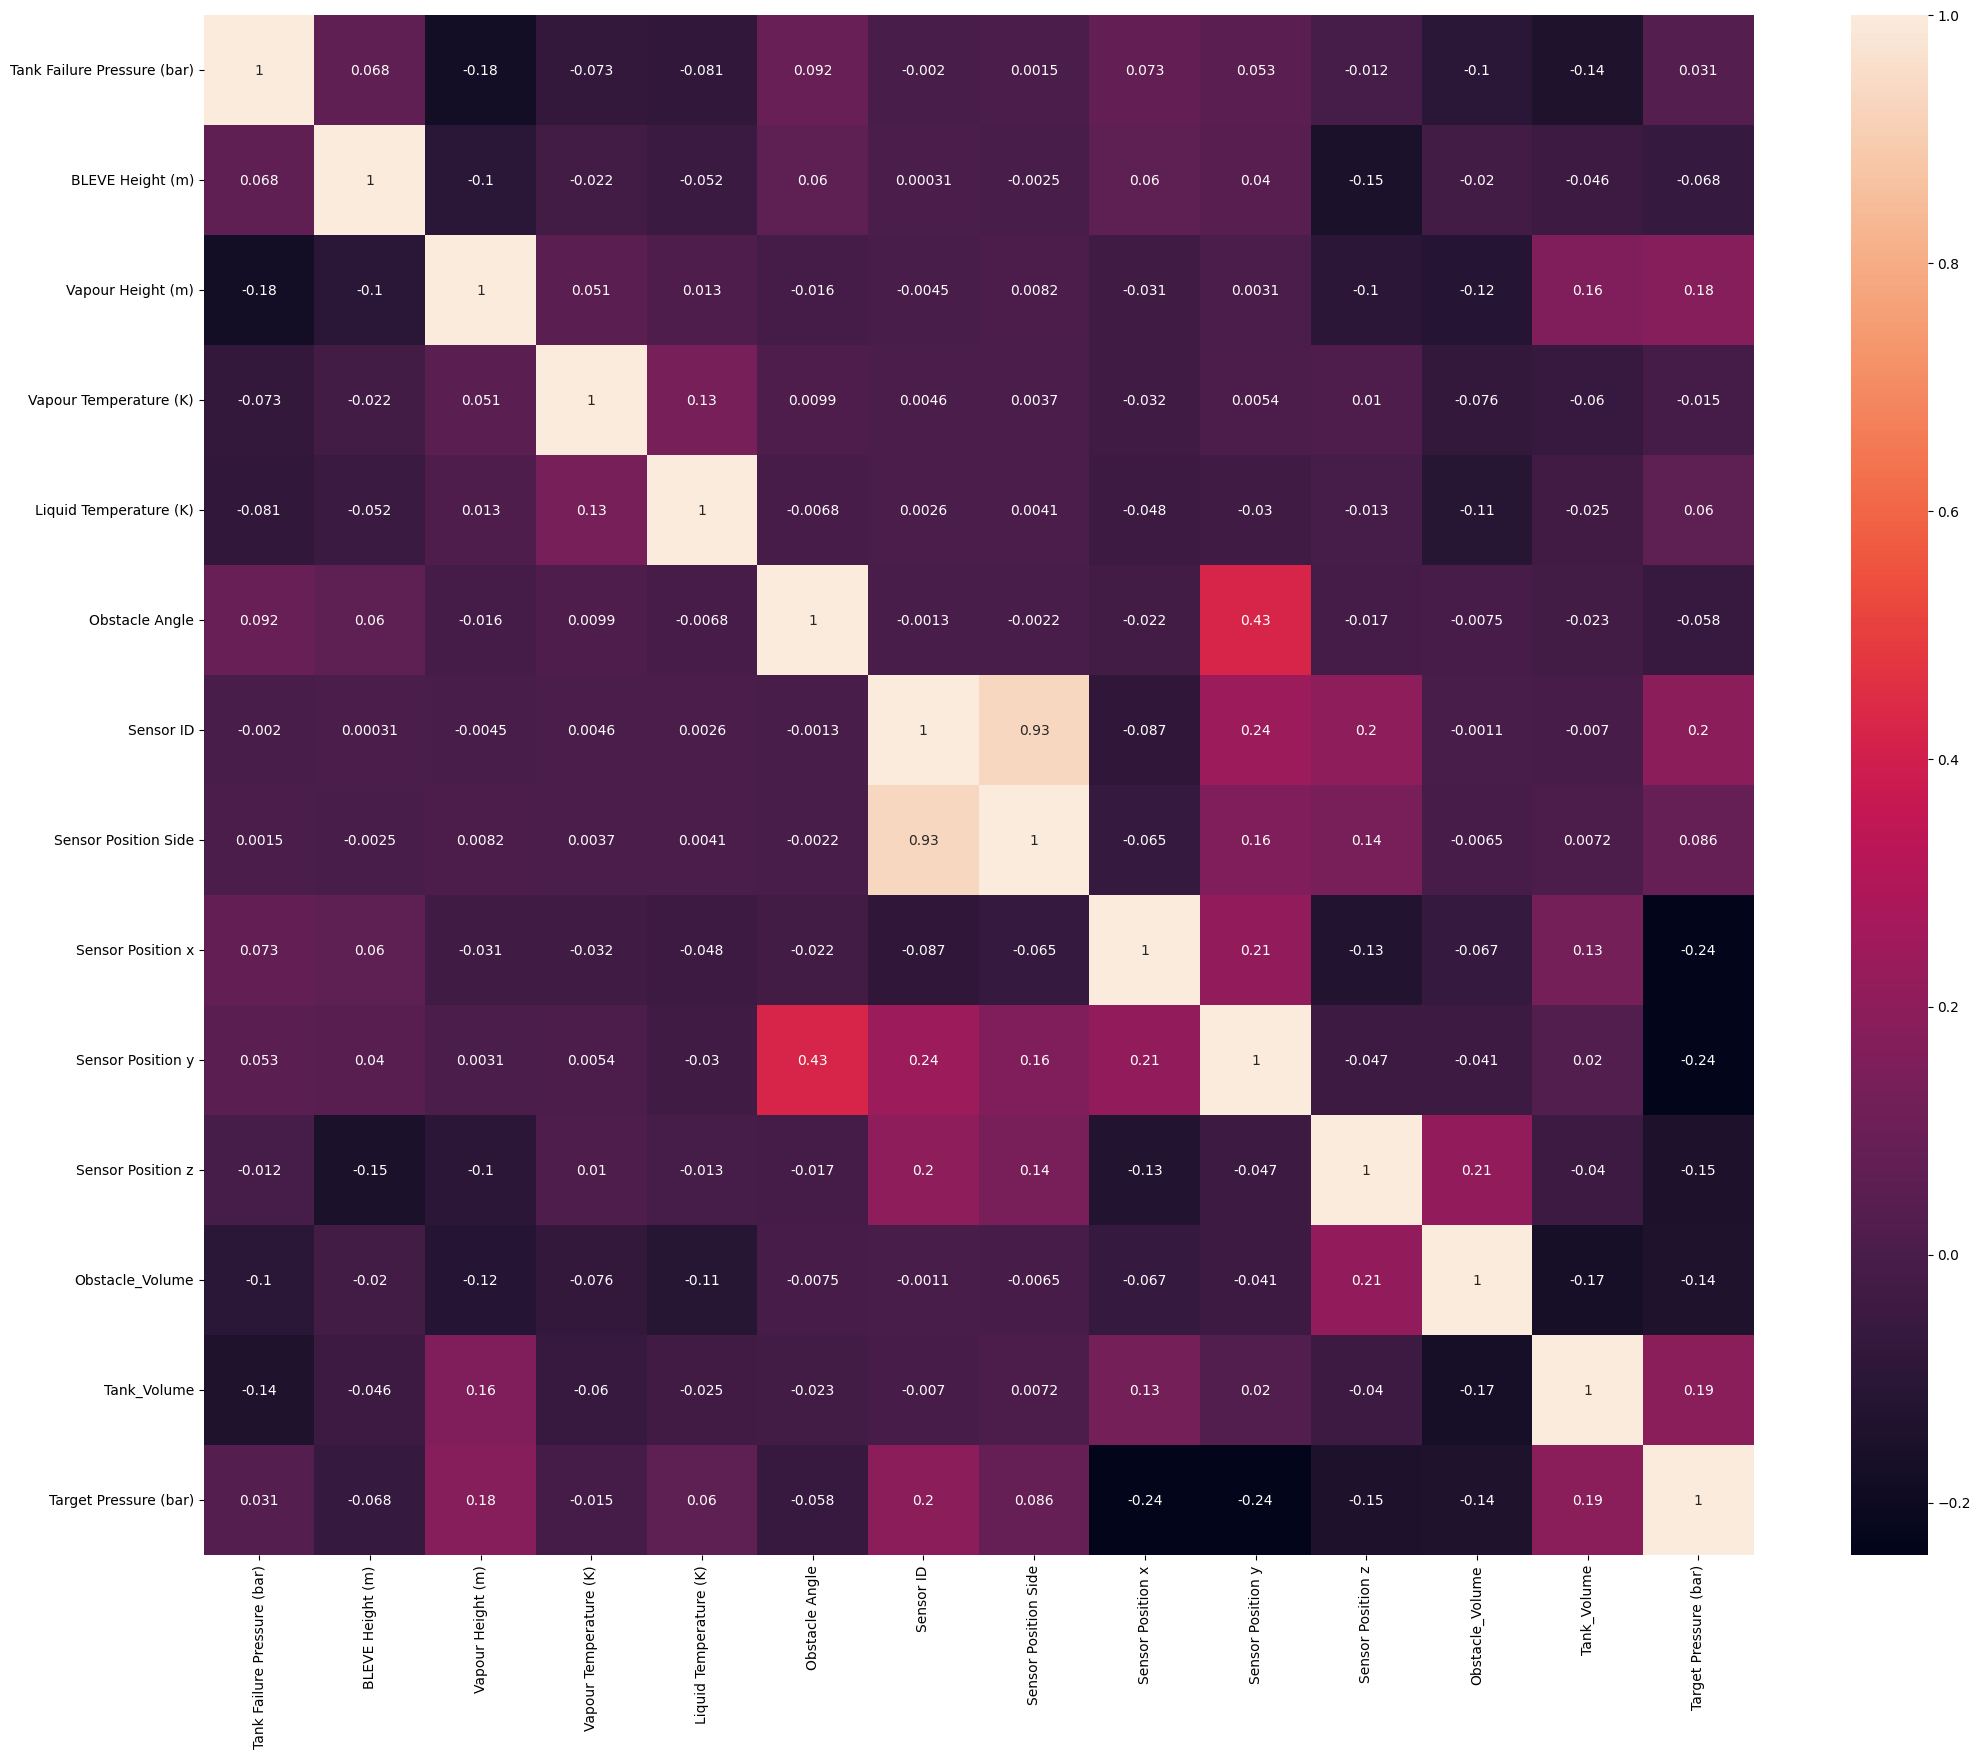

In [26]:
corr_df = pd.DataFrame(df.corr(numeric_only=True))
fig ,ax  = plt.subplots(figsize = (25,20))
sns.heatmap(corr_df,annot=True,ax=ax)

In [27]:
cols_to_encode = ['Status', 'Sensor ID', 'Sensor Position Side']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=cols_to_encode, dtype=int,drop_first=True)
df_encoded.head()

,Tank Failure Pressure (bar),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Angle,Sensor Position x,Sensor Position y,Sensor Position z,Obstacle_Volume,Tank_Volume,Target Pressure (bar),Status_Superheated,Sensor ID_2,Sensor ID_3,Sensor ID_4,Sensor ID_5,Sensor ID_6,Sensor ID_7,Sensor ID_8,Sensor ID_9,Sensor ID_10,Sensor ID_11,Sensor ID_12,Sensor ID_13,Sensor ID_14,Sensor ID_15,Sensor ID_16,Sensor ID_17,Sensor ID_18,Sensor ID_19,Sensor ID_20,Sensor ID_21,Sensor ID_22,Sensor ID_23,Sensor ID_24,Sensor ID_25,Sensor ID_26,Sensor ID_27,Sensor Position Side_2,Sensor Position Side_3,Sensor Position Side_4,Sensor Position Side_5
0,7.3,1.8,0.6,522.8,354.3,13,12.15,7.90,10.7,85.8,12.96,0.199929,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,7.3,1.8,0.6,522.8,354.3,13,12.50,-2.95,-1.9,85.8,12.96,0.435681,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,7.3,1.8,0.6,522.8,354.3,13,12.50,-2.95,4.4,85.8,12.96,0.264031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,7.3,1.8,0.6,522.8,354.3,13,12.50,-2.95,10.7,85.8,12.96,0.270576,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,7.3,1.8,0.6,522.8,354.3,13,12.50,-2.70,11.0,85.8,12.96,0.204675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [28]:
df_encoded.shape

(16746, 43)

<Axes: >

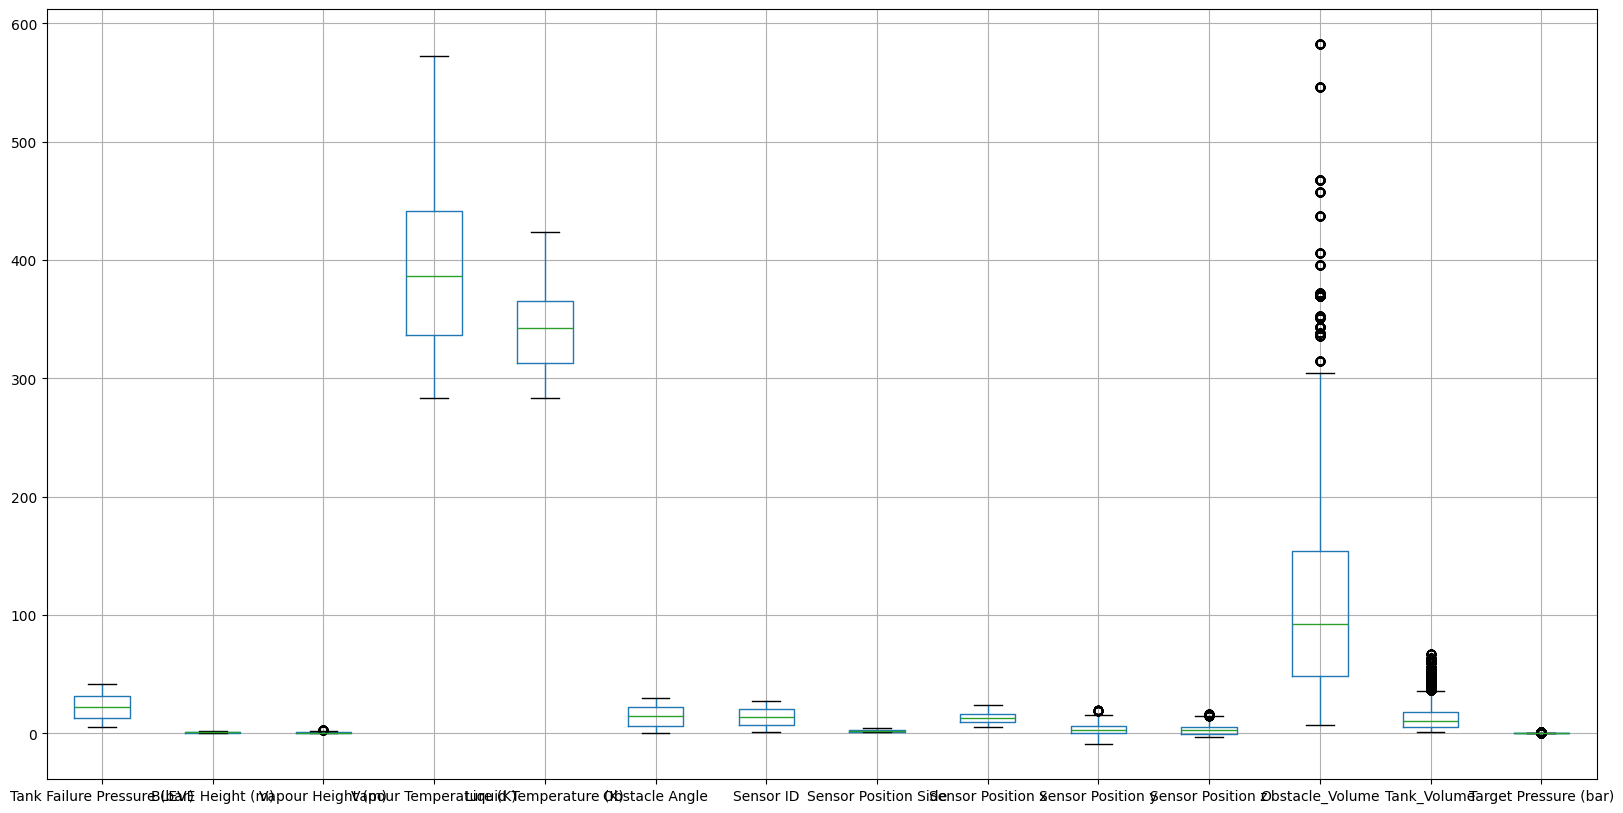

In [29]:
# checking Outliers
df.boxplot(figsize=(20,10))

In [37]:
#Outlier Quantity in each variable
Outlier =[]

def outliers_IQR_test(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR = q3-q1
    lower = q1 - (1.5*IQR)
    upper = q3 + (1.5*IQR)
    outliers=[]
    for i in df:
        if i<=lower or i>=upper:
            outliers.append(i)
    return outliers
a = df.drop(columns='Status',axis=1)
for i in a.columns:
    outliers_list = outliers_IQR_test(a[i])
    print(i,'--->',len(outliers_list))

Tank Failure Pressure (bar) ---> 0
BLEVE Height (m) ---> 0
Vapour Height (m) ---> 156
Vapour Temperature (K) ---> 0
Liquid Temperature (K) ---> 0
Obstacle Angle ---> 0
Sensor ID ---> 0
Sensor Position Side ---> 0
Sensor Position x ---> 0
Sensor Position y ---> 19
Sensor Position z ---> 89
Obstacle_Volume ---> 952
Tank_Volume ---> 1166
Target Pressure (bar) ---> 781


## We got many outliers hence will use tree based approach

In [38]:
# Modelling libs

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

x = df_encoded.drop(columns="Target Pressure (bar)")
y = df_encoded[["Target Pressure (bar)"]]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=30)

rf = RandomForestRegressor(random_state=30)
dt = DecisionTreeRegressor(random_state=30)

rf.fit(x_train, y_train)
dt.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_percentage_error
#predicting the values of test train data
test_pred=rf.predict(x_test)
train_pred=rf.predict(x_train)

print('Random_forest')
print('train MAPE: ',mean_absolute_percentage_error(y_train, train_pred))
print('train r2 score: ',r2_score(y_train,train_pred))
print('--------------')
print('test MAPE: ',mean_absolute_percentage_error(y_test, test_pred))
print('test r2 score: ',r2_score(y_test,test_pred))

test_pred=dt.predict(x_test)
train_pred=dt.predict(x_train)

print('\n','='*30,'\ndecision_tree')
print('train MAPE: ',mean_absolute_percentage_error(y_train, train_pred))
print('train r2 score: ',r2_score(y_train,train_pred))
print('--------------')
print('test MAPE: ',mean_absolute_percentage_error(y_test, test_pred))
print('test r2 score: ',r2_score(y_test,test_pred))

Random_forest
train MAPE:  0.03311613308915609
train r2 score:  0.9956289104181001
--------------
test MAPE:  0.08379710375838181
test r2 score:  0.970999090808422

decision_tree
train MAPE:  0.0
train r2 score:  1.0
--------------
test MAPE:  0.05632480243811003
test r2 score:  0.9586786044771564


In [39]:
## We are getting good accuracy No need for hyper parameter tuning

In [40]:
# Creating first submission file
test = pd.read_csv('test.csv')

# Transforming test file
test['Obstacle_Volume'] = test['Obstacle Width (m)'] * test['Obstacle Height (m)'] *test['Obstacle Thickness (m)']
test["Tank_Volume"] = test["Tank Length (m)"] * test['Tank Height (m)'] * test['Tank Width (m)']

test.drop(columns='ID',axis='y',inplace=True)
test.drop(columns=['Tank Width (m)','Tank Length (m)','Tank Height (m)','Obstacle Width (m)','Obstacle Thickness (m)','Obstacle Height (m)','Liquid Ratio (%)','Obstacle Distance to BLEVE (m)','Liquid Critical Pressure (bar)','Liquid Boiling Temperature (K)','Liquid Critical Temperature (K)'],axis='y',inplace=True)
cols_to_encode = ['Status', 'Sensor ID', 'Sensor Position Side']

# Apply one-hot encoding
test_encoded = pd.get_dummies(test, columns=cols_to_encode, dtype=int,drop_first=True)
test_encoded.head()

,Tank Failure Pressure (bar),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Angle,Sensor Position x,Sensor Position y,Sensor Position z,Obstacle_Volume,Tank_Volume,Status_Superheated,Sensor ID_2,Sensor ID_3,Sensor ID_4,Sensor ID_5,Sensor ID_6,Sensor ID_7,Sensor ID_8,Sensor ID_9,Sensor ID_10,Sensor ID_11,Sensor ID_12,Sensor ID_13,Sensor ID_14,Sensor ID_15,Sensor ID_16,Sensor ID_17,Sensor ID_18,Sensor ID_19,Sensor ID_20,Sensor ID_21,Sensor ID_22,Sensor ID_23,Sensor ID_24,Sensor ID_25,Sensor ID_26,Sensor ID_27,Sensor Position Side_2,Sensor Position Side_3,Sensor Position Side_4,Sensor Position Side_5
0,16.8,0.4,1.6,389.9,387.2,1,12.05,-5.6,-1.0,36.0,52.976,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,16.8,0.4,1.6,389.9,387.2,1,12.05,-5.6,1.3,36.0,52.976,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16.8,0.4,1.6,389.9,387.2,1,12.05,-5.6,3.6,36.0,52.976,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16.8,0.4,1.6,389.9,387.2,1,12.05,0.2,-1.0,36.0,52.976,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,16.8,0.4,1.6,389.9,387.2,1,12.05,0.2,1.3,36.0,52.976,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
test_encoded.shape

(3203, 42)

In [42]:
test_pred=rf.predict(test_encoded)
prediction = pd.DataFrame(test_pred,columns=['Target Pressure (bar)'])
prediction.to_csv('final.csv', index_label='ID')

In [43]:
# Experimenting

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, epochs=60, batch_size=32, validation_data=(x_test, y_test))

In [53]:
# applying ANN
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np

model = keras.Sequential([
    layers.Input(shape=(42,)),             # Input layer
    layers.Dense(32, activation='relu'),   # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)                        # Output layer with a single neuron (for regression)
])

AttributeError: module 'keras.backend' has no attribute 'RandomGenerator'